In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
import math

%matplotlib inline

In [2]:
hw3 = pd.read_csv('hw3.csv')
hw3.head()

,ts,open,high,low,close,volume,volumeUSD,token,chain
0,2021-12-02 14:00:00,22.4150,22.4913,22.0816,22.3516,31502.151631,NaN,UNI,ETH
1,2021-12-02 23:00:00,4.8043,4.8043,4.7426,4.7806,73686.230000,NaN,CRV,ETH
2,2021-12-10 15:00:00,182.4900,NaN,175.2100,175.8600,73736.747000,NaN,SOL,SOL
3,2021-12-10 18:00:00,3978.4300,3989.7400,3932.0000,3972.3400,18508.040102,NaN,ETH,ETH
4,2021-12-08 21:00:00,193.3240,194.2420,192.5640,193.1540,69426.909000,NaN,SOL,SOL


In [3]:
hw3 ['volumeUSD'] = hw3 ['volume'] * hw3 ['close']

In [4]:
hw3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2667 entries, 0 to 2666
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ts         2667 non-null   object 
 1   open       2667 non-null   float64
 2   high       2163 non-null   float64
 3   low        2378 non-null   float64
 4   close      2531 non-null   float64
 5   volume     2667 non-null   float64
 6   volumeUSD  2531 non-null   float64
 7   token      2667 non-null   object 
 8   chain      2667 non-null   object 
dtypes: float64(6), object(3)
memory usage: 187.6+ KB


In [5]:
hw3['token'].value_counts()

BTC                                   323
COMP                                  322
CRV                                   318
SOL                                   318
USDT                                  314
UNI                                   312
AAVE                                  312
ETH                                   298
<span name="tokenName">UNI</span>      30
<span name="tokenName">ETH</span>      28
<span name="tokenName">USDT</span>     19
<span name="tokenName">CRV</span>      17
<span name="tokenName">SOL</span>      16
<span name="tokenName">AAVE</span>     16
<span name="tokenName">BTC</span>      14
<span name="tokenName">COMP</span>     10
Name: token, dtype: int64

In [6]:
hw3.token.value_counts().sum() == hw3.shape[0]

True

In [7]:
hw3.duplicated().sum()

307

In [9]:
hw3 = hw3.drop_duplicates()

In [10]:
hw3.duplicated().sum()

0

<AxesSubplot:>

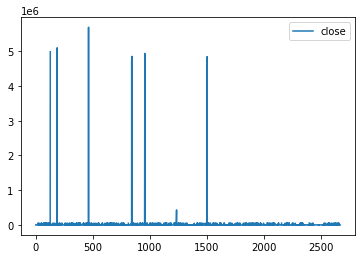

In [11]:
hw3[['token', 'close']].plot()

In [12]:
hw3.token.unique()

array(['UNI', 'CRV', 'SOL', 'ETH', 'AAVE', 'USDT', 'COMP', 'BTC',
       '<span name="tokenName">UNI</span>',
       '<span name="tokenName">CRV</span>',
       '<span name="tokenName">SOL</span>',
       '<span name="tokenName">USDT</span>',
       '<span name="tokenName">COMP</span>',
       '<span name="tokenName">AAVE</span>',
       '<span name="tokenName">ETH</span>',
       '<span name="tokenName">BTC</span>'], dtype=object)

In [13]:
hw3.loc[hw3.token.str.contains('span'), 'token'] = hw3.loc[hw3.token.str.contains('span'), 'token'].str.extract('<span name=\"tokenName\">(.*?)<\\/span>').values

In [14]:
hw3.token.unique()

array(['UNI', 'CRV', 'SOL', 'ETH', 'AAVE', 'USDT', 'COMP', 'BTC'],
      dtype=object)

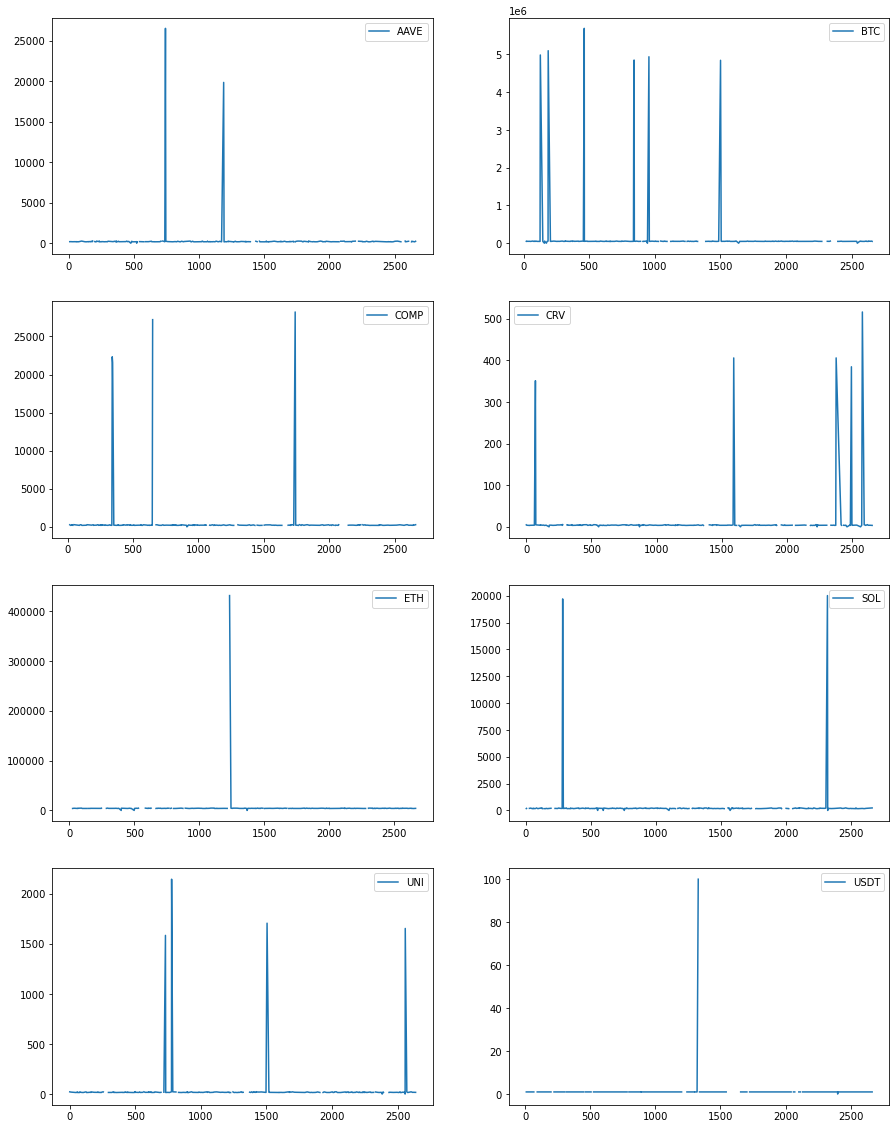

In [15]:
tokens_in_hw3 = hw3.token.unique()

fig, axes = plt.subplots(nrows=math.ceil(tokens_in_hw3.size / 2), ncols=2, figsize=(15, 5 * math.ceil(tokens_in_hw3.size / 2)))

idx = 0
for label, hw3_token in hw3[['token', 'close']].groupby('token'):
    hw3_token['close'].plot(ax=axes[idx // 2, idx % 2], label=label)
    axes[idx // 2, idx % 2].legend()
    
    idx += 1

In [16]:
hw3.groupby('token').size()

token
AAVE    295
BTC     295
COMP    295
CRV     295
ETH     295
SOL     295
UNI     295
USDT    295
dtype: int64

In [17]:
pd.isnull(hw3).sum(axis=0)

ts             0
open           0
high         450
low          256
close        116
volume         0
volumeUSD    116
token          0
chain          0
dtype: int64

In [18]:
hw3.loc[hw3['token'].str.contains('<a>'), 'token'] = hw3.loc[hw3['token'].str.contains('<a>'), 'token'].str.extract('<a>(.|\n)*?<\/a>')

In [24]:
hw3.loc[hw3['close'].isnull(), 'close'] = 0.5 * (hw3.loc[hw3['close'].isnull(), 'high'] + hw3.loc[hw3['close'].isnull(), 'low'])

In [20]:
hw3.loc[hw3['high'].isnull(), 'high'] = 1.1 * (hw3.loc[hw3['high'].isnull(), 'open'])


In [21]:
hw3.loc[hw3['low'].isnull(), 'low'] = 0.9 * (hw3.loc[hw3['low'].isnull(), 'open'])

In [26]:
hw3 ['volumeUSD'] = hw3 ['volume'] * hw3 ['close']

In [27]:
pd.isnull(hw3).sum(axis=0)

ts           0
open         0
high         0
low          0
close        0
volume       0
volumeUSD    0
token        0
chain        0
dtype: int64

In [28]:
hw3.loc[hw3.close / hw3.open >= 2]

,ts,open,high,low,close,volume,volumeUSD,token,chain
71,2021-12-10 21:00:00,3.4600,3.51000,3.4600,351.00,1.080245e+05,3.791659e+07,CRV,ETH
127,2021-12-12 14:00:00,49542.3900,54496.62900,49534.7100,4983812.00,3.426704e+02,1.707805e+09,BTC,BTC
187,2021-12-07 08:00:00,51224.9900,51398.26000,50883.3400,5097338.00,4.433800e+02,2.260058e+09,BTC,BTC
282,2021-12-07 18:00:00,197.0930,197.80000,194.3450,19698.90,6.369084e+04,1.254640e+09,SOL,SOL
341,2021-12-08 01:00:00,223.8500,224.98000,220.3900,22333.00,1.477532e+03,3.299772e+07,COMP,ETH
344,2021-12-08 12:00:00,214.8900,217.10000,212.3800,21568.00,2.372441e+03,5.116881e+07,COMP,ETH
462,2021-12-02 23:00:00,56904.6500,56952.81000,56639.4900,5688883.00,3.821792e+02,2.174173e+09,BTC,BTC
650,2021-12-02 02:00:00,269.7800,272.12000,268.2900,27212.00,4.564180e+02,1.242005e+07,COMP,ETH
730,2021-12-06 07:00:00,16.0391,16.22980,15.8308,1584.74,7.441640e+04,1.179306e+08,UNI,ETH
741,2021-12-01 11:00:00,266.9360,267.96300,264.2370,26501.50,1.018631e+03,2.699525e+07,AAVE,ETH


In [29]:
hw3.loc[hw3.close / hw3.open >= 2, 'close'] = 0.5 * (hw3.loc[hw3.close / hw3.open >= 2, 'high'] + hw3.loc[hw3.close / hw3.open >= 2, 'low'])

In [30]:
hw3.loc[hw3.close / hw3.open >= 2].size

0

In [31]:
hw3.loc[hw3.close / hw3.open <= 0.5]

,ts,open,high,low,close,volume,volumeUSD,token,chain
158,2021-12-03 12:00:00,56891.7000,57209.70000,56858.0200,570.337400,1.897550e+02,108224.364406,BTC,BTC
173,2021-12-07 07:00:00,50941.5000,51272.83000,50936.0500,512.250000,3.124719e+02,160063.708497,BTC,BTC
176,2021-12-06 01:00:00,3.6302,3.63650,3.4638,0.035758,4.227913e+05,15118.169875,CRV,ETH
399,2021-12-03 08:00:00,4584.3400,4588.03000,4548.0600,45.722700,2.468821e+03,112881.159811,ETH,ETH
475,2021-12-02 08:00:00,245.8090,247.51800,245.7290,2.467160,3.166740e+02,781.285426,AAVE,ETH
499,2021-12-10 23:00:00,3996.1700,4395.78700,3953.7700,39.613200,8.379371e+03,331933.687405,ETH,ETH
520,2021-12-01 17:00:00,265.2620,291.78820,262.9060,2.632300,9.809190e+02,2582.073084,AAVE,ETH
551,2021-12-11 12:00:00,171.8500,172.41000,169.9900,1.700800,1.572705e+04,26748.566640,SOL,SOL
556,2021-12-10 08:00:00,3.5900,3.63000,3.5400,0.035700,1.034540e+05,3693.306729,CRV,ETH
594,2021-12-09 21:00:00,181.3980,181.96300,178.7750,1.809360,1.044998e+05,189077.756319,SOL,SOL


In [32]:
hw3.loc[hw3.close / hw3.open <= 0.5, 'close'] = 0.5 * (hw3.loc[hw3.close / hw3.open >= 2, 'high'] + hw3.loc[hw3.close / hw3.open >= 2, 'low'])

In [33]:
hw3.loc[hw3.close / hw3.open <= 0.5].size

0

In [34]:
hw3.loc[hw3.low / hw3.open >= 1.001].size

0

In [35]:
hw3.loc[hw3.high / hw3.open <= 0.999].size

0

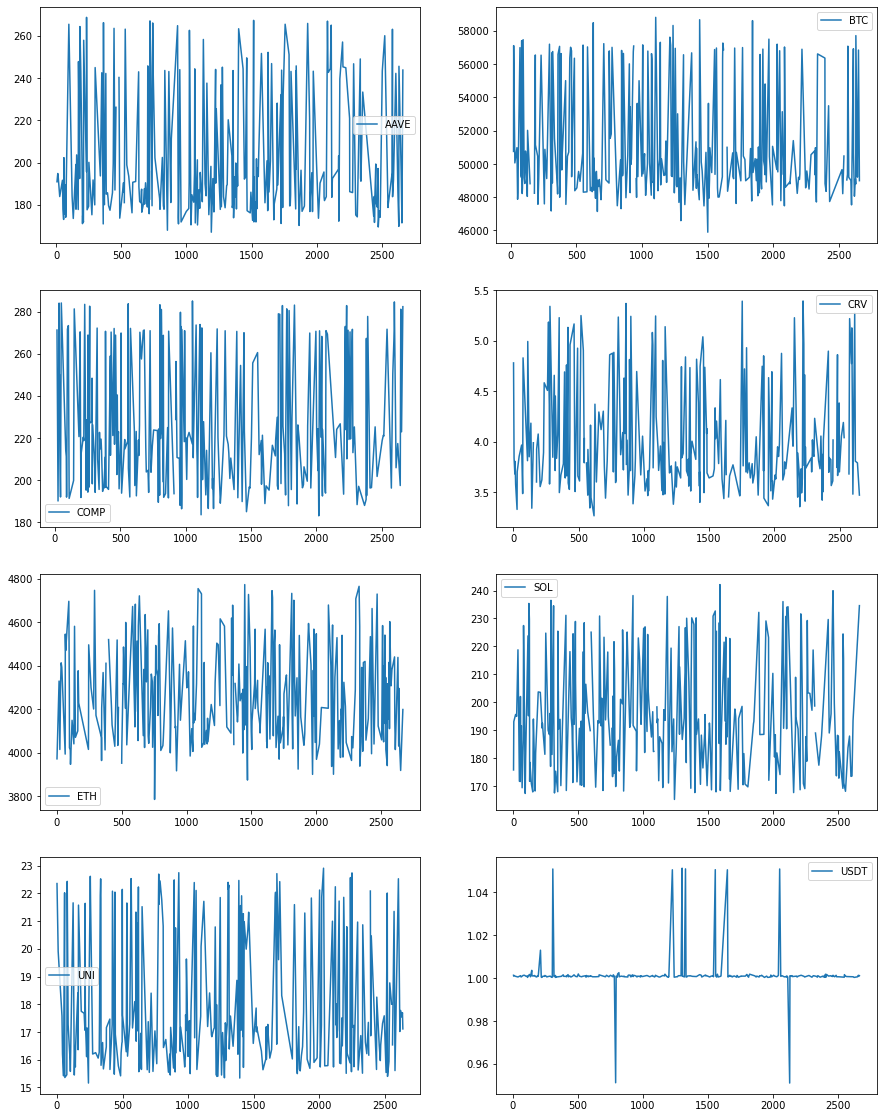

In [36]:
fig, axes = plt.subplots(nrows=math.ceil(tokens_in_hw3.size / 2), ncols=2, figsize=(15, 5 * math.ceil(tokens_in_hw3.size / 2)))

idx = 0
for label, hw3_token in hw3[['token', 'close']].groupby('token'):
    hw3_token['close'].plot(ax=axes[idx // 2, idx % 2], label=label)
    axes[idx // 2, idx % 2].legend()
    
    idx += 1

In [37]:
volumeusd_by_chain = hw3.groupby('chain')[['volumeUSD']].sum()
volumeusd_by_chain.sort_values('volumeUSD', ascending=False, inplace=True)
volumeusd_by_chain

,volumeUSD
chain,
BTC,3.860188e+10
ETH,1.740021e+10
SOL,6.910827e+09
USDT,1.520320e+09


<AxesSubplot:title={'center':'VolumeUSD by Chain'}, xlabel='chain'>

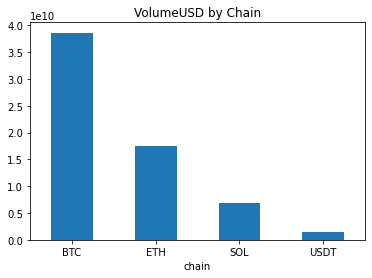

In [38]:
volumeusd_by_chain.plot(kind='bar', title='VolumeUSD by Chain', rot=0, legend=False)

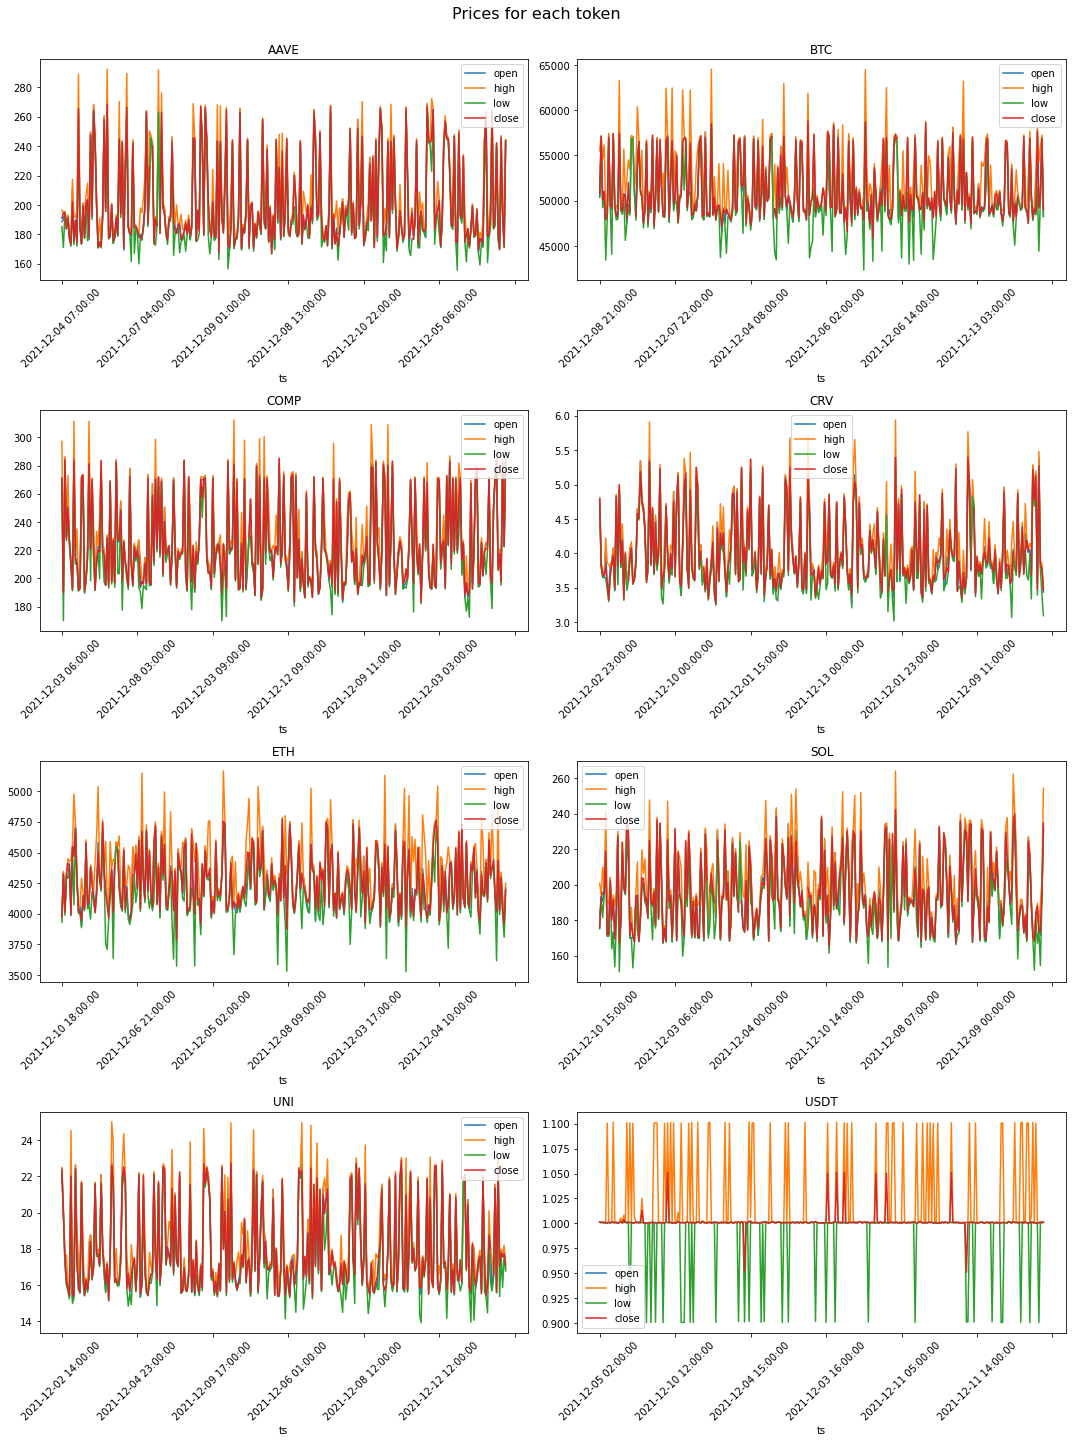

In [39]:
n_tokens = len(hw3.token.unique())

fig, axes = plt.subplots(nrows=math.ceil(n_tokens/2), ncols=2,
                         figsize=(15, 5*math.ceil(n_tokens/2)))

for i, (token, token_hw3) in enumerate(hw3[['ts','token','open','high','low','close']].groupby('token')):
    token_hw3.set_index('ts', inplace=True)
    token_hw3[['open','high','low','close']].plot(ax=axes[i//2, i%2], rot=45, title=token)

plt.suptitle('Prices for each token', fontsize=16, y=1)
plt.tight_layout()